### Importing Libraries

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

#### Reading csv

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [5]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [7]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [8]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [9]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
model_dt.score(x_test,y_test)

0.8130774697938877

In [11]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1024
           1       0.74      0.49      0.59       383

    accuracy                           0.81      1407
   macro avg       0.78      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [12]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [13]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [14]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [15]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9366980325064157
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       514
           1       0.93      0.96      0.94       655

    accuracy                           0.94      1169
   macro avg       0.94      0.93      0.94      1169
weighted avg       0.94      0.94      0.94      1169



In [16]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[466  48]
 [ 26 629]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [19]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [20]:
y_pred=model_rf.predict(x_test)

In [21]:
model_rf.score(x_test,y_test)

0.8045486851457001

In [22]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1024
           1       0.75      0.42      0.54       383

    accuracy                           0.80      1407
   macro avg       0.78      0.68      0.71      1407
weighted avg       0.80      0.80      0.78      1407



In [45]:
x.shape

(7032, 50)

In [23]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [24]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [25]:
model_rf_smote=RandomForestClassifier(n_estimators=100,
                                      criterion='gini',
                                      random_state = 100,
                                      max_depth=6,
                                      min_samples_leaf=8)

In [26]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [27]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [28]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [29]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9390862944162437
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       555
           1       0.92      0.97      0.94       627

    accuracy                           0.94      1182
   macro avg       0.94      0.94      0.94      1182
weighted avg       0.94      0.94      0.94      1182



In [30]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[499  56]
 [ 16 611]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

###### We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

#### Performing PCA

In [31]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [32]:
model=RandomForestClassifier(n_estimators=100, 
                             criterion='gini',
                             random_state = 100,
                             max_depth=6,
                             min_samples_leaf=8)

In [33]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [34]:
yr_predict_pca = model.predict(xr_test_pca)

In [35]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [36]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7098138747884941
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       555
           1       0.69      0.81      0.75       627

    accuracy                           0.71      1182
   macro avg       0.71      0.70      0.70      1182
weighted avg       0.71      0.71      0.71      1182



##### With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

#### Pickling the model

In [37]:
import pickle

In [38]:
filename = 'model.sav'

In [39]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [40]:
load_model = pickle.load(open(filename, 'rb'))

In [41]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [42]:
model_score_r1

0.9390862944162437

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.

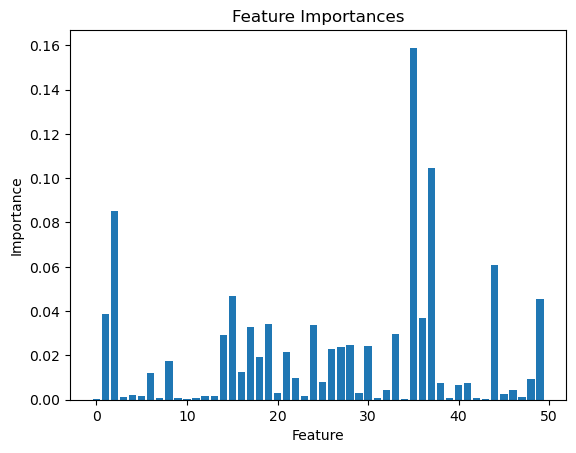

In [43]:
import joblib
import matplotlib.pyplot as plt

# Load the saved model
model = joblib.load('model.sav')

# Example: Visualize feature importances (if applicable)
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    plt.bar(range(len(feature_importances)), feature_importances)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.show()

In [44]:
print(dir(model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_params', '_validate_y_class_weight', 'apply', 'base_estimator', 'base_estimator_', 'bootstrap', 'ccp_alpha', 'class_weight', 'classes_